In [1]:
import matflow as mf #new matflow
import defdap
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import pickle
import HRDIC_vs_CP as hc
%matplotlib inline

In [2]:
from glob import glob 

In [41]:
region = 'A3_zone3'

local_validated = 'dev'
plot_maps = False

if local_validated ==True:
    in_put = '../results/local_validated/{}/'.format(region)
    output = '../results/local_validated/{}/'.format(region)
elif local_validated == 'dev':
    print('dev')
    in_put ='../results/dev_validated/{}/'.format(region)
    output = '../results/dev_validated/{}/'.format(region)
elif local_validated == False:
    in_put ='../results/macro_validated/{}/'.format(region)
    output = '../results/macro_validated/{}/'.format(region)

dev


In [42]:
CP_mean_strain = np.load(in_put + '{}_mean_strain.npy'.format(region)) #true strain
CP_mean_stress = np.load(in_put + '{}_mean_stress.npy'.format(region)) # true stress
CP_eng_stress = CP_mean_stress[:,0,0] / (np.exp(CP_mean_strain[:,0,0]))

In [43]:
e11 = np.load('e11_{}.npy'.format(region))
force_at_image_a3 = [30,113,332,1451, 1896,2342,2791,3250,3707, 4131,4495,4714,4823, 4860, 4915,4946,4974,4988,5009] # b2 named from tanist
force_at_image_b2 = [91,333,684,1985, 2461,2938,3417,3882,4271, 4518,4625, 4683, 4717,4742,4760,4773] # a3 named from tanist

width  = 3    /1000 #mm -> m
depth  = 1.75 /1000 #mm -> m
area = width * depth
exp_eng_stress_at_image_b2 = np.array(force_at_image_b2) / (area * 1000000)
exp_eng_stress_at_image_a3 = np.array(force_at_image_a3) / (area * 1000000)

In [44]:
#len(A3_zone2_e11)

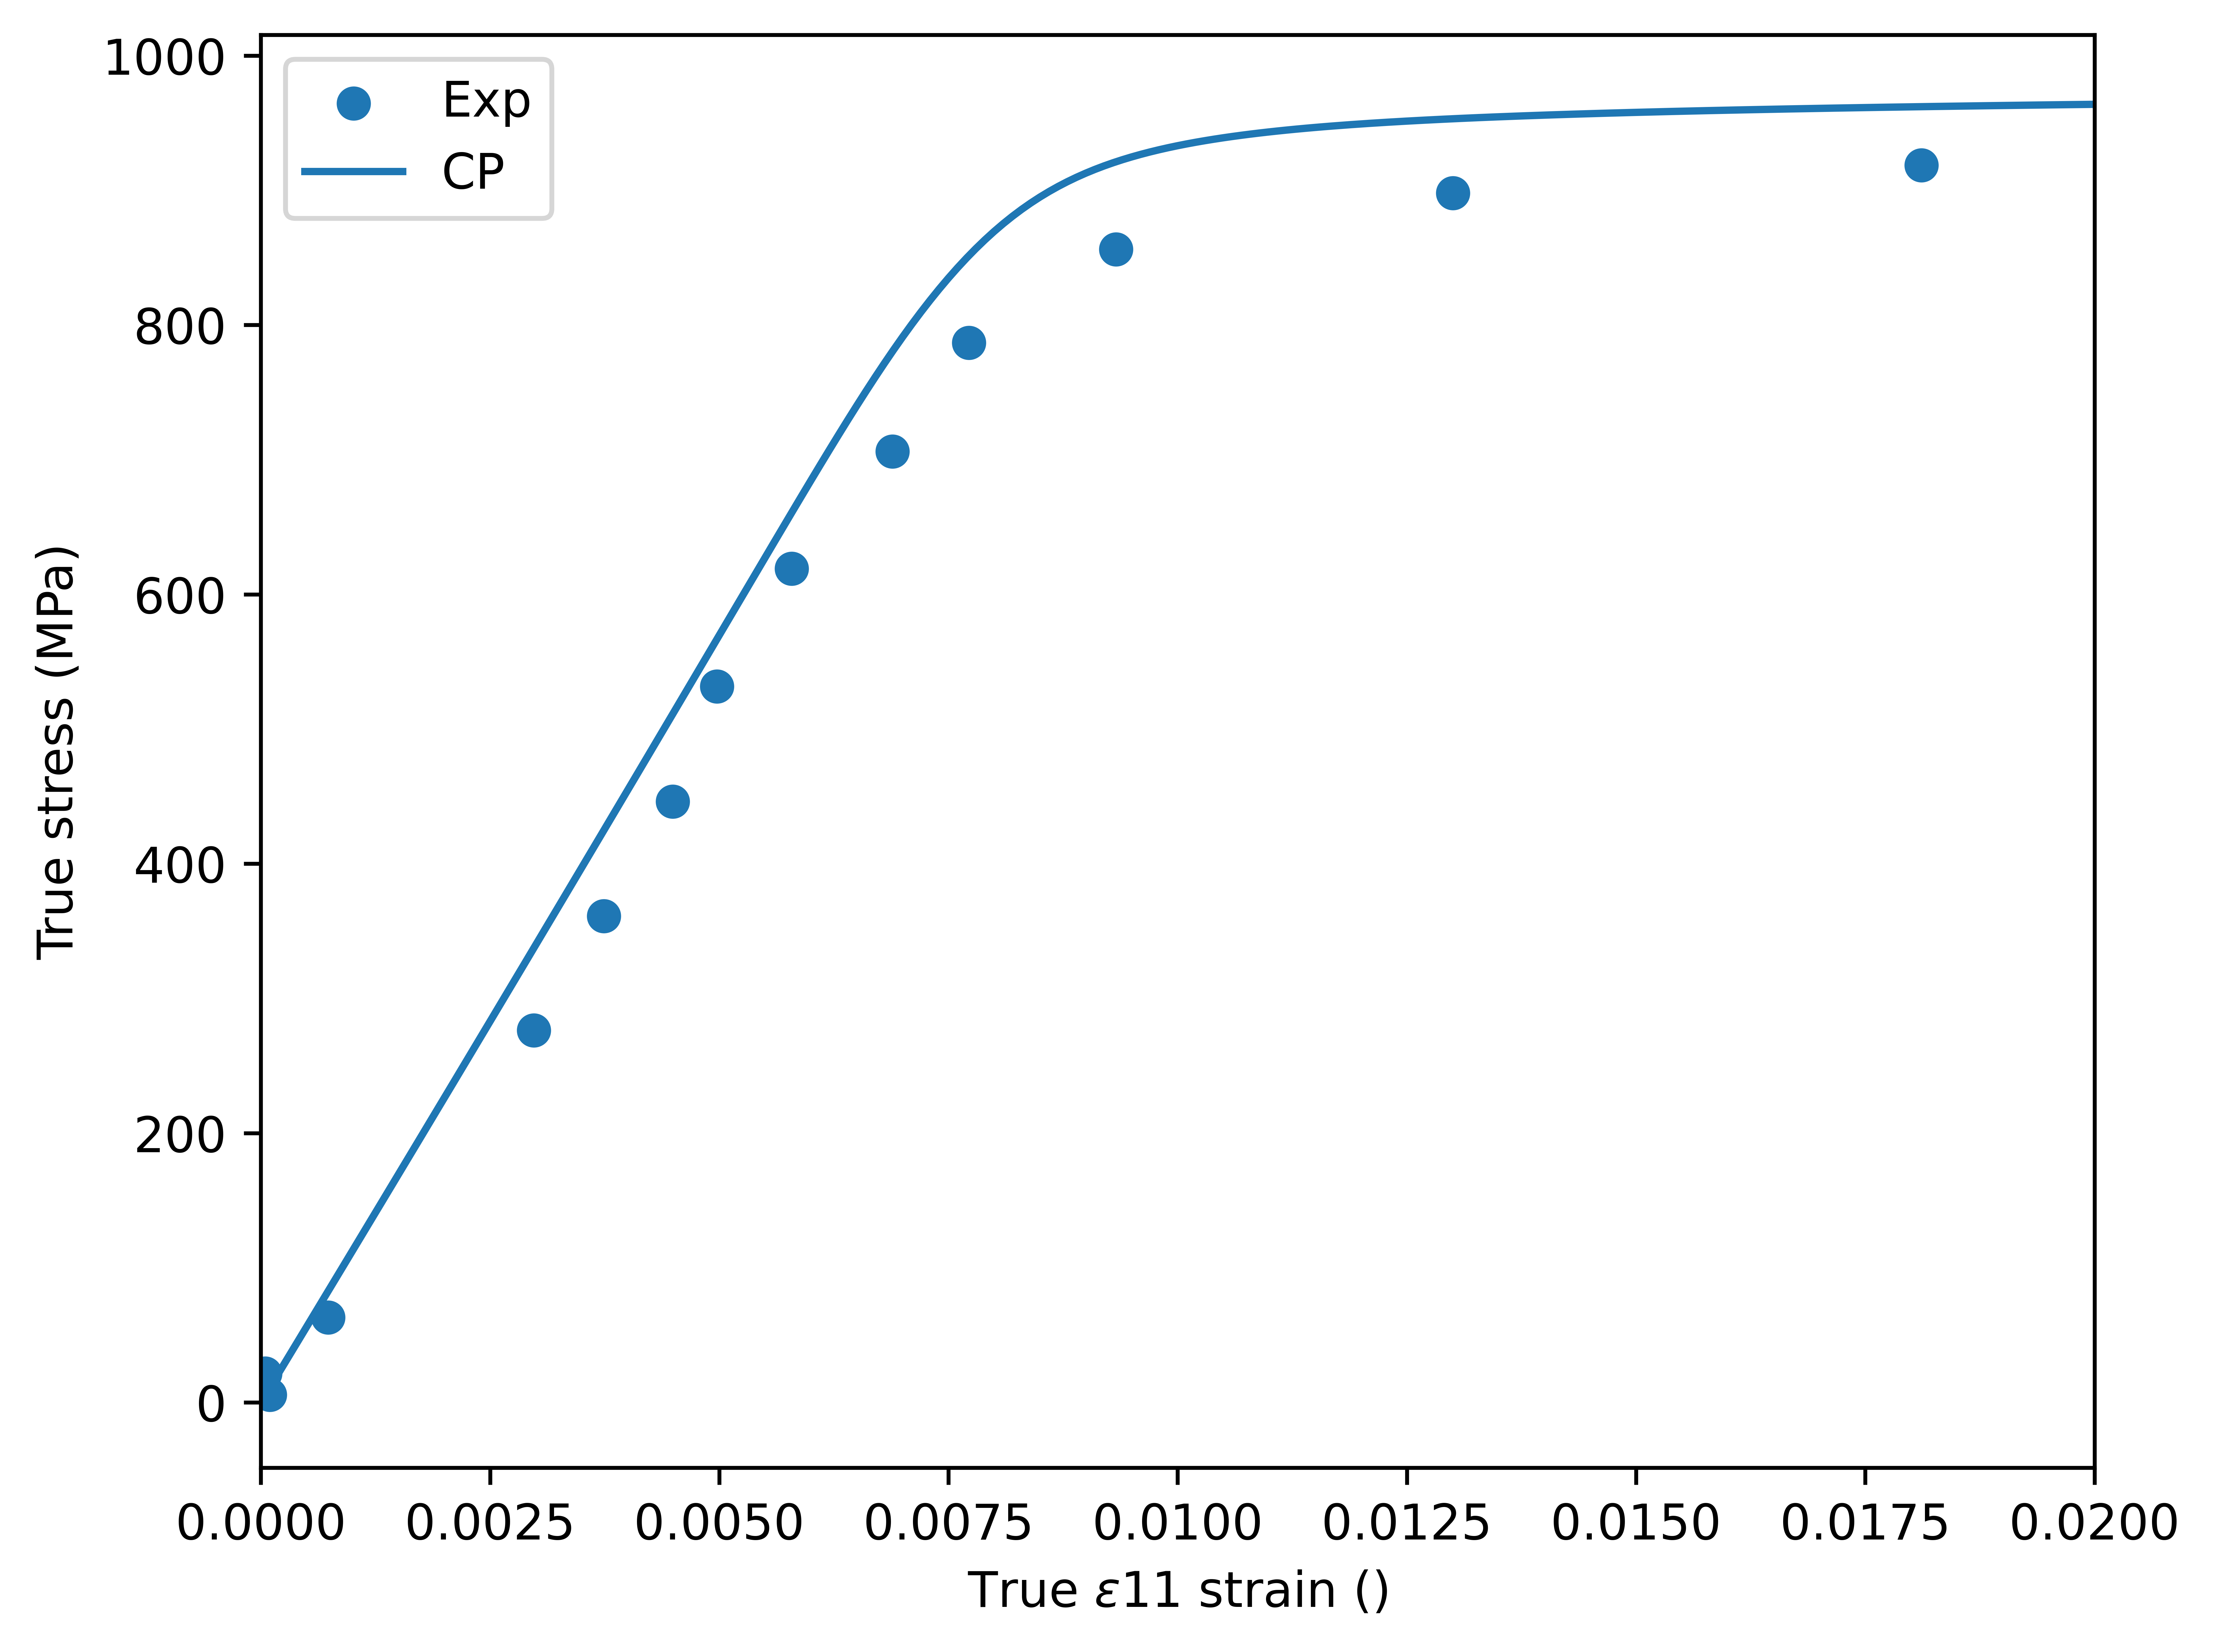

In [45]:
plt.figure(dpi=1200)#figsize=(8,6),dpi=1200)
plt.scatter(e11,exp_eng_stress_at_image_a3[0:len(e11)],label='Exp')
plt.plot(CP_mean_strain[:,0,0],CP_mean_stress[:,0,0]/1e6,label='CP')
plt.xlabel(r'True $\epsilon$11 strain ()')
plt.ylabel('True stress (MPa)')
plt.xlim(0,0.02)
plt.legend(loc='upper left')
plt.tight_layout()
#plt.title(region)
if plot_maps:
    plt.savefig(output + '{}_stress_strain_curve.png'.format(region))

In [46]:
A3_zone1_e11 = np.load('e11_A3_zone1.npy')
A3_zone2_e11 = np.load('e11_A3_zone2.npy')
A3_zone3_e11 = np.load('e11_A3_zone3.npy')
if local_validated == True:
    A3_zone1_CP_mean_strain = np.load('../results/local_validated/A3_zone1/A3_zone1_mean_strain.npy') #true strain
    A3_zone1_CP_mean_stress = np.load('../results/local_validated/A3_zone1/A3_zone1_mean_stress.npy') # true stress
    print('1')
    A3_zone2_CP_mean_strain = np.load('../results/local_validated/A3_zone2/A3_zone2_mean_strain.npy') #true strain
    A3_zone2_CP_mean_stress = np.load('../results/local_validated/A3_zone2/A3_zone2_mean_stress.npy') # true stress

    A3_zone3_CP_mean_strain = np.load('../results/local_validated/A3_zone3/A3_zone3_mean_strain.npy') #true strain
    A3_zone3_CP_mean_stress = np.load('../results/local_validated/A3_zone3/A3_zone3_mean_stress.npy') # true stress
elif local_validated == False: 
    A3_zone1_CP_mean_strain = np.load('../results/macro_validated/A3_zone1/A3_zone1_mean_strain.npy') #true strain
    A3_zone1_CP_mean_stress = np.load('../results/macro_validated/A3_zone1/A3_zone1_mean_stress.npy') # true stress
    print('2')
    A3_zone2_CP_mean_strain = np.load('../results/macro_validated/A3_zone2/A3_zone2_mean_strain.npy') #true strain
    A3_zone2_CP_mean_stress = np.load('../results/macro_validated/A3_zone2/A3_zone2_mean_stress.npy') # true stress

    A3_zone3_CP_mean_strain = np.load('../results/macro_validated/A3_zone3/A3_zone3_mean_strain.npy') #true strain
    A3_zone3_CP_mean_stress = np.load('../results/macro_validated/A3_zone3/A3_zone3_mean_stress.npy') # true stress
    
elif local_validated == 'dev':
    A3_zone1_CP_mean_strain = np.load('../results/dev_validated/A3_zone1/A3_zone1_mean_strain.npy') #true strain
    A3_zone1_CP_mean_stress = np.load('../results/dev_validated/A3_zone1/A3_zone1_mean_stress.npy') # true stress
    print('dev')
    A3_zone2_CP_mean_strain = np.load('../results/dev_validated/A3_zone2/A3_zone2_mean_strain.npy') #true strain
    A3_zone2_CP_mean_stress = np.load('../results/dev_validated/A3_zone2/A3_zone2_mean_stress.npy') # true stress

    A3_zone3_CP_mean_strain = np.load('../results/dev_validated/A3_zone3/A3_zone3_mean_strain.npy') #true strain
    A3_zone3_CP_mean_stress = np.load('../results/dev_validated/A3_zone3/A3_zone3_mean_stress.npy') # true stress

dev


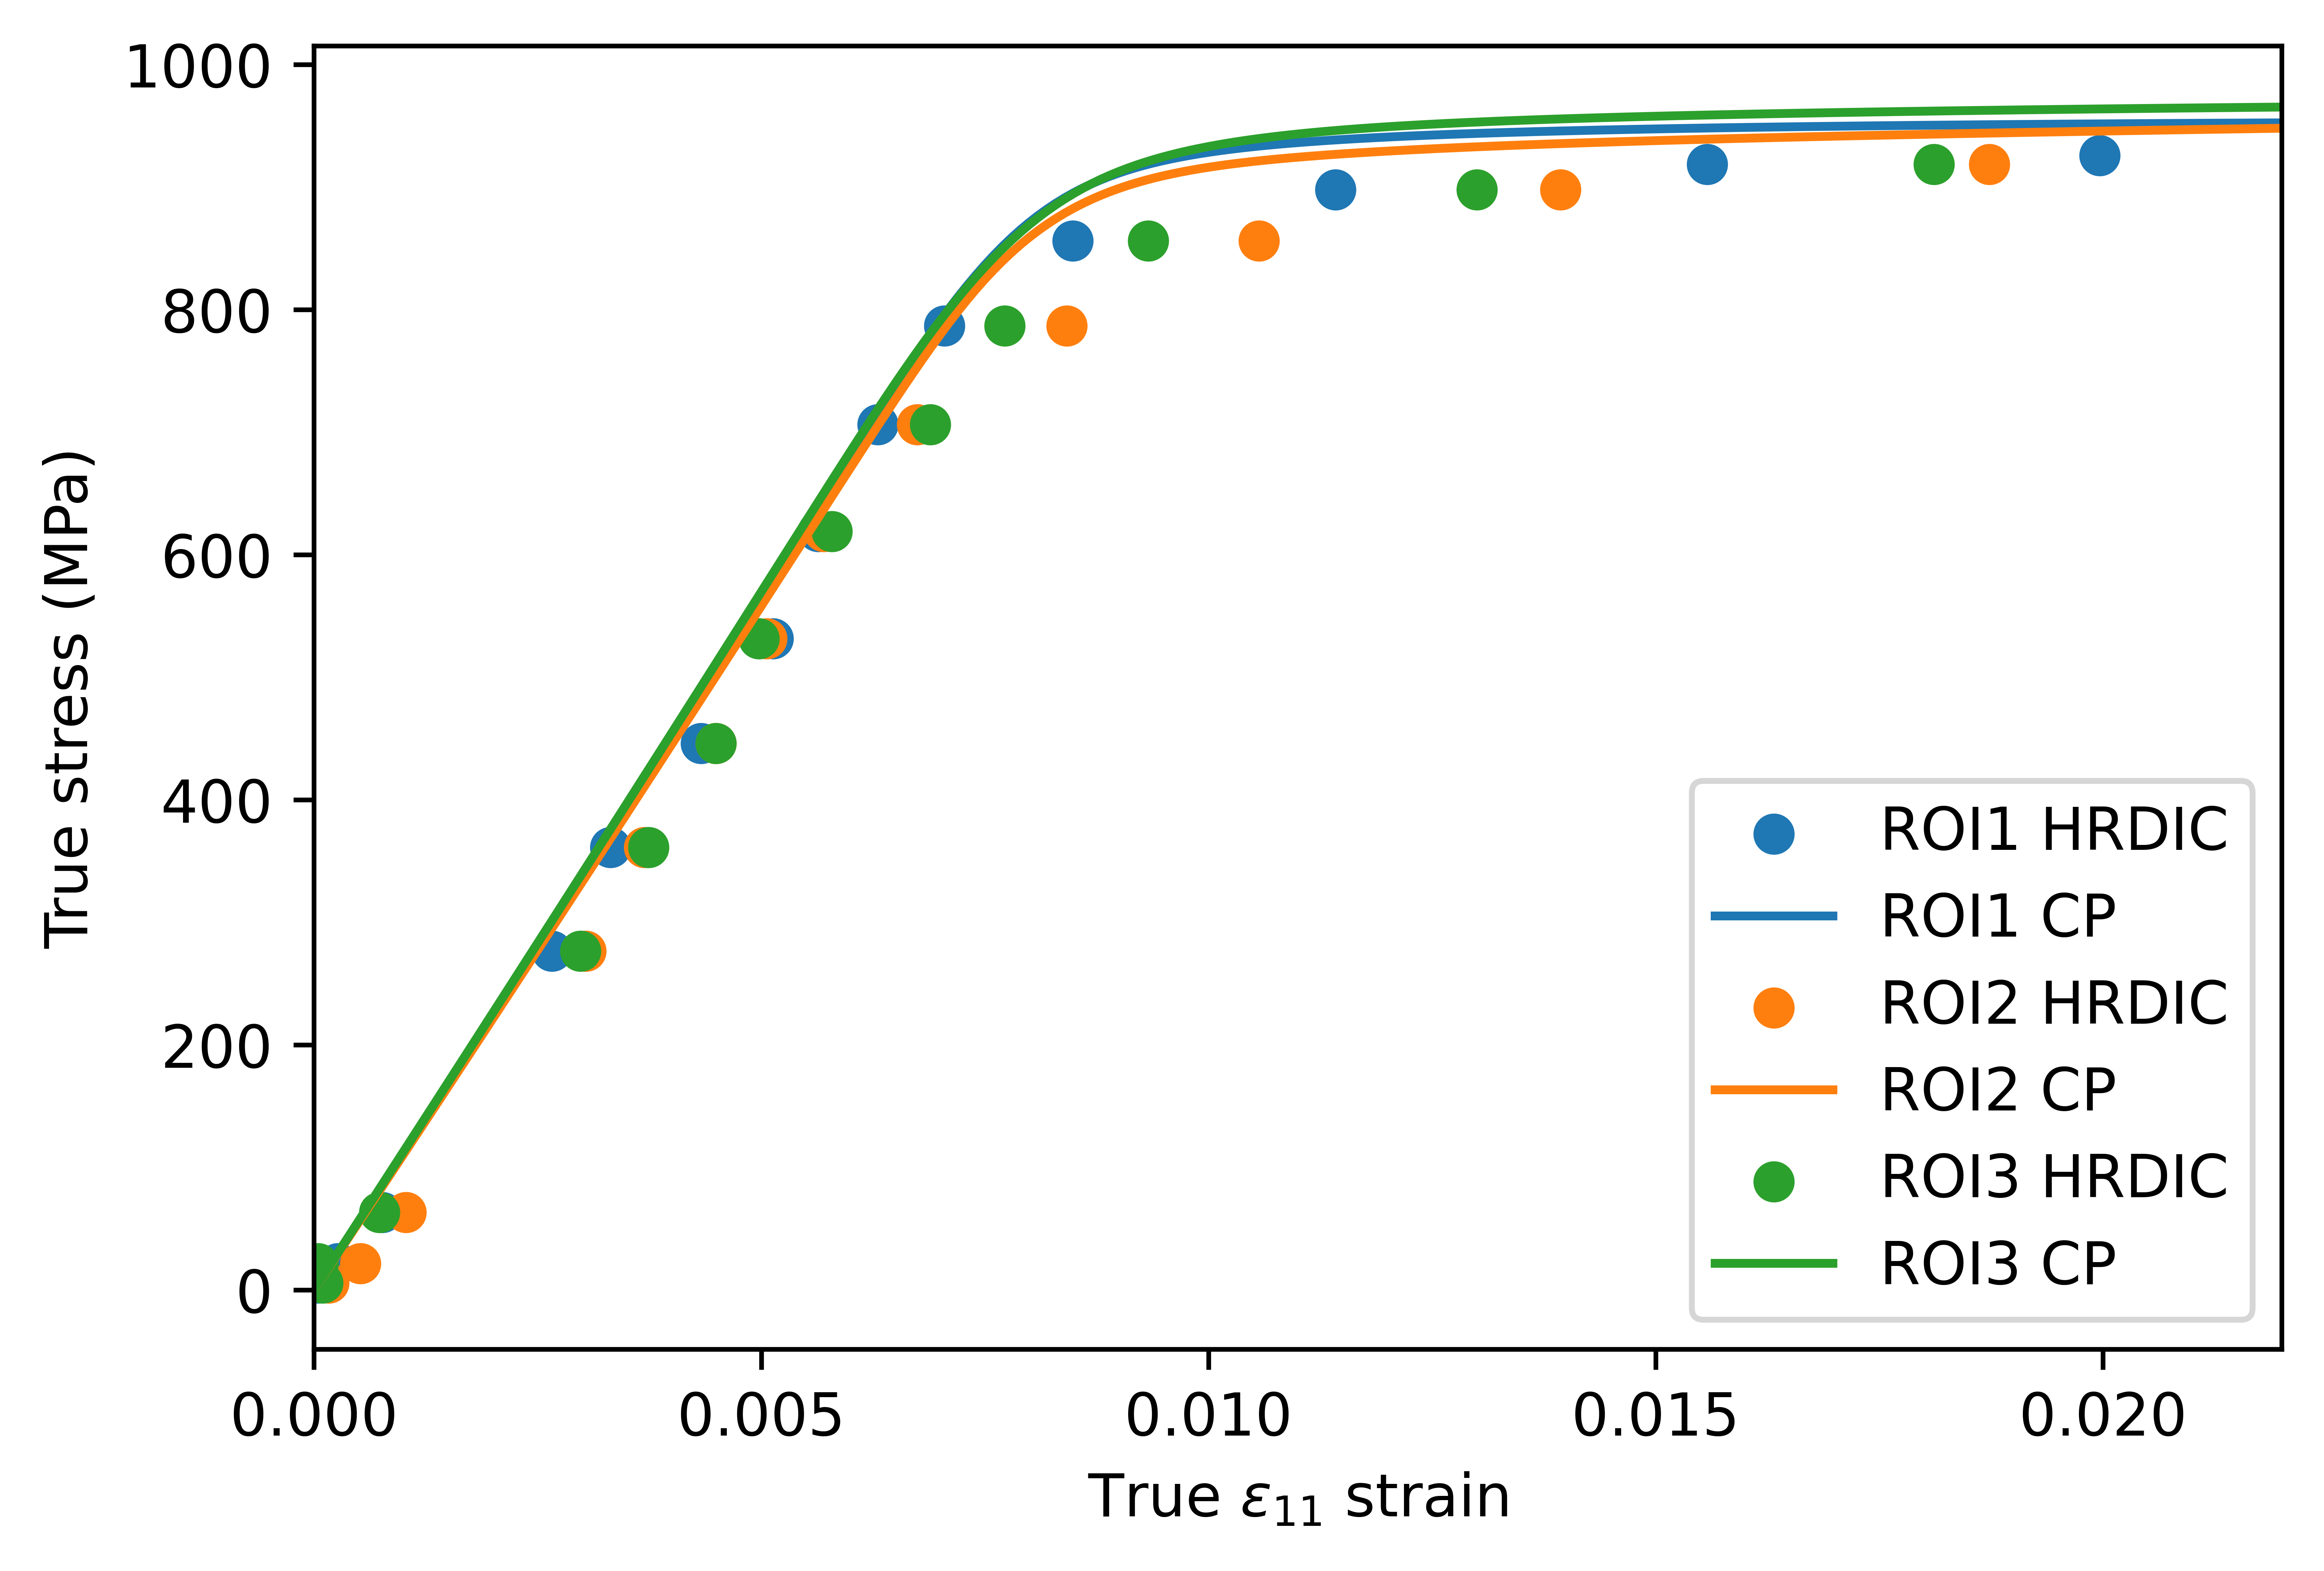

In [47]:
plt.figure(dpi=1200,figsize=(6,4))  # Adjust the figure size as needed

plt.scatter(A3_zone1_e11, exp_eng_stress_at_image_a3[0:len(e11)], label='ROI1 HRDIC')
plt.plot(A3_zone1_CP_mean_strain[:, 0, 0], A3_zone1_CP_mean_stress[:,0,0] / 1e6, label='ROI1 CP')

plt.scatter(A3_zone2_e11, exp_eng_stress_at_image_a3[0:len(e11)], label='ROI2 HRDIC')
plt.plot(A3_zone2_CP_mean_strain[:, 0, 0], A3_zone2_CP_mean_stress[:,0,0] / 1e6, label='ROI2 CP')

plt.scatter(A3_zone3_e11, exp_eng_stress_at_image_a3[0:len(e11)], label='ROI3 HRDIC')
plt.plot(A3_zone3_CP_mean_strain[:, 0, 0], A3_zone3_CP_mean_stress[:,0,0] / 1e6, label='ROI3 CP')

#plt.axvline(x=0.007, color='r', alpha=0.5, linestyle='--', label='Elastic limit')
plt.xlabel(r'True $\epsilon_{11}$ strain')
plt.ylabel('True stress (MPa)')
plt.xlim(0, 0.022)
plt.xticks([0, 0.005, 0.01, 0.015, 0.02])
plt.legend(loc='lower right')
#plt.title('a')
if plot_maps:
    plt.savefig(output + '../combined/CP_vs_HRDIC_stress_strain.png')

# Strain comparison 

### Import data and combine HRDIC and CP data sets into one data set

In [48]:
file_name = "{}_strain_DIC.pickle".format(region)
with open(file_name, "rb") as pickle_file:
    DIC_strain = pickle.load(pickle_file)

if local_validated ==True: 
    file_name = "../results/local_validated/{0}/{0}_CP_strain.pickle".format(region)
    with open(file_name, "rb") as pickle_file:
        CP_strain1 = pickle.load(pickle_file)   
elif local_validated == False: 
    file_name = "..results/macro_validated/{0}/{0}_CP_strain.pickle".format(region)
    with open(file_name, "rb") as pickle_file:
        CP_strain1 = pickle.load(pickle_file)   
elif local_validated == 'dev': 
    file_name = "../results/dev_validated/{0}/{0}_CP_strain.pickle".format(region)
    print('dev')
    with open(file_name, "rb") as pickle_file:
        CP_strain1 = pickle.load(pickle_file)  

dev


In [49]:
CP_strain1.keys()

dict_keys(['step_5', 'step_6', 'step_7', 'step_8', 'step_9', 'step_10', 'step_11', 'step_12', 'step_13', 'step_14'])

In [50]:
if 'step_14' in CP_strain1:
    keys_to_add = ['step_1', 'step_2', 'step_3', 'step_4']
else:
    keys_to_add = ['step_1', 'step_2', 'step_3', 'step_4','step_14']
    
CP_strain = {key: CP_strain1.get(key, {}) for key in keys_to_add}
CP_strain.update(CP_strain1)

In [51]:
combined_strain = {}
for step in DIC_strain.keys():
    combined_strain[step] = {**DIC_strain[step], **CP_strain[step]}
#combined_strain

In [52]:
df = pd.DataFrame(combined_strain['step_12'])
df.head()

grain_ID  grain_size ($\mu m^2$)   DIC_e11  DIC_shear_strain    CP_e11  \
0        59             2827.890625  0.011113          0.011385  0.011093   
1        72            36357.050781  0.015961          0.014480  0.012235   
2        81              183.339844  0.012818          0.012254  0.012814   
3        96              139.882812  0.014386          0.012985  0.010905   
4        99              352.890625  0.010753          0.010072  0.011136   

   CP_shear_strain  
0         0.012026  
1         0.011659  
2         0.014032  
3         0.011212  
4         0.010953

In [53]:
with open(output + '{}_combined_strain.pickle'.format(region), 'wb') as file:
    pickle.dump(combined_strain, file)

### Exact mean and std values from combined data set, then plot

In [54]:
mean_HRDIC_ESS = []
mean_CP_ESS = []
std_HRDIC_ESS = []
std_CP_ESS = []
mean_HRDIC_e11 = []
mean_CP_e11 = []
std_HRDIC_e11 = []
std_CP_e11 = []

k = 5
for step in range(k, len(combined_strain)):
    try:
        step_data = combined_strain['step_{}'.format(step)]
    except KeyError:
        print("Error: 'step_{}' not found in combined_strain.".format(step))
        continue

    DIC_shear_strain = step_data.get('DIC_shear_strain', [])
    CP_shear_strain = step_data.get('CP_shear_strain', [])
    DIC_e11 = step_data.get('DIC_e11', [])
    CP_e11 = step_data.get('CP_e11', [])

    mean_HRDIC_ESS.append(np.mean(DIC_shear_strain))
    mean_CP_ESS.append(np.mean(CP_shear_strain))
    std_HRDIC_ESS.append(np.std(DIC_shear_strain))
    std_CP_ESS.append(np.std(CP_shear_strain))
    
    mean_HRDIC_e11.append(np.mean(DIC_e11))
    mean_CP_e11.append(np.mean(CP_e11))
    std_HRDIC_e11.append(np.std(DIC_e11))
    std_CP_e11.append(np.std(CP_e11))


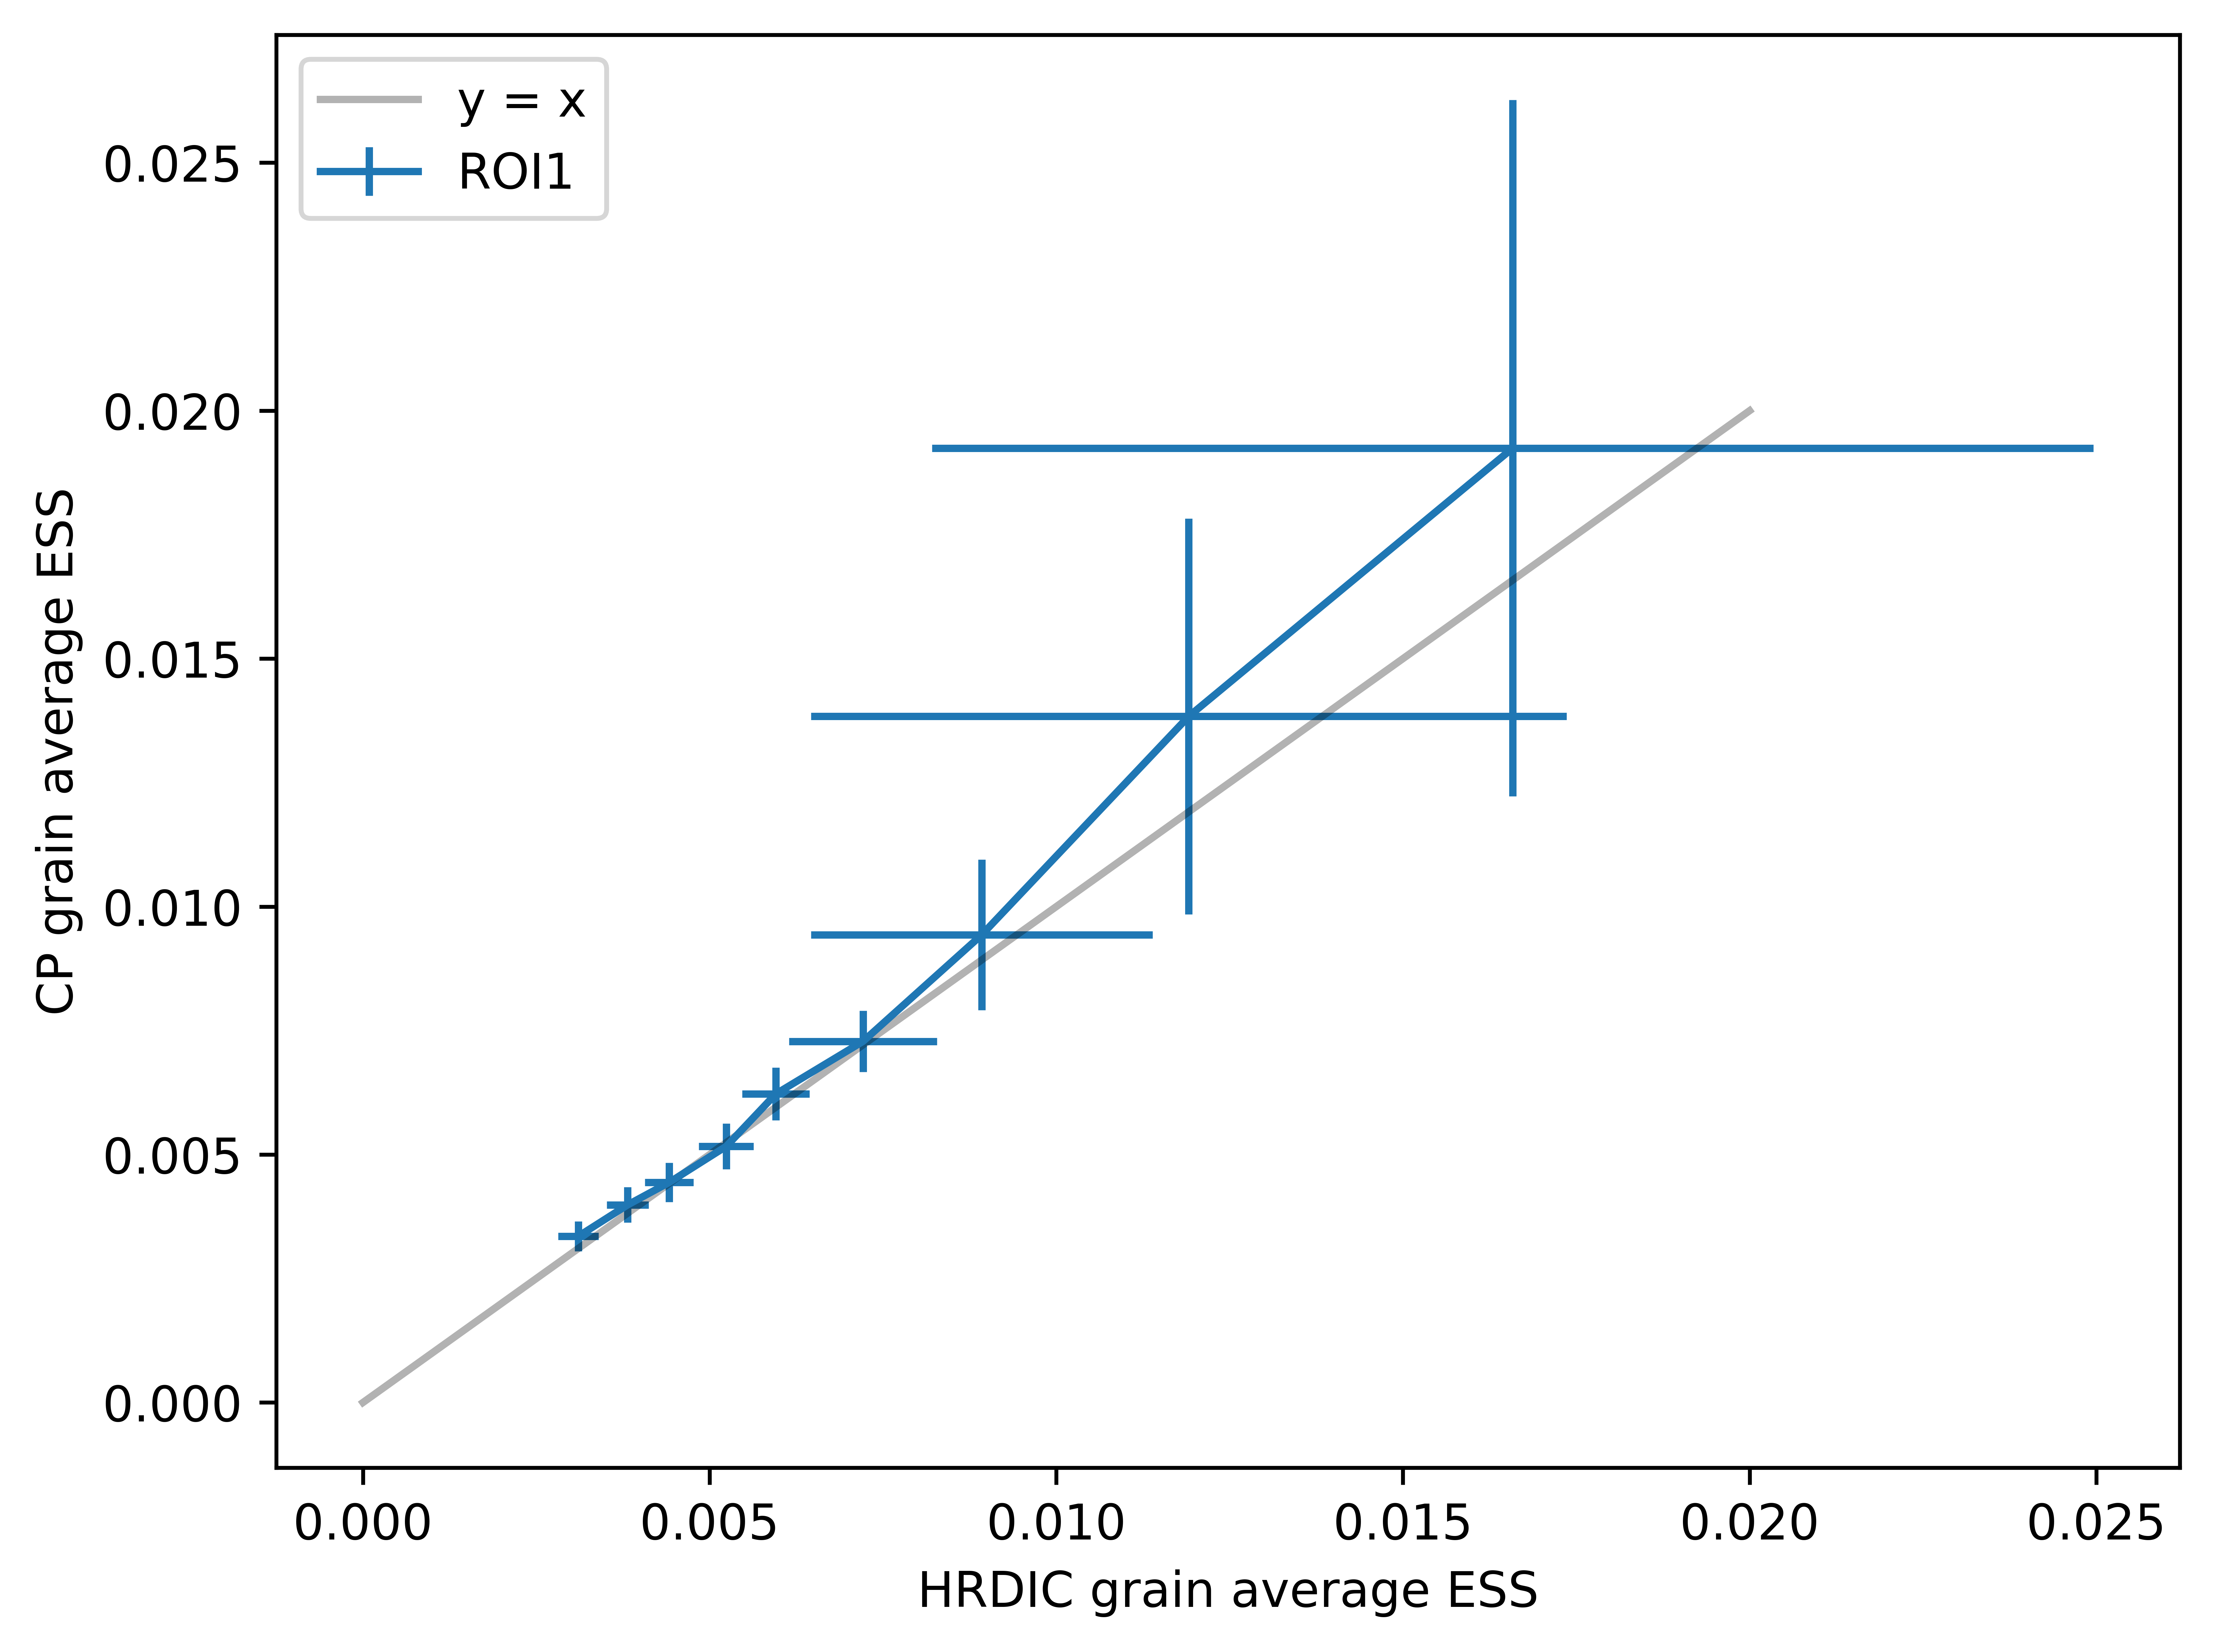

In [55]:
plt.figure(dpi=1200)#,figsize=(6,4))#figsize=(8,8),dpi=600)
plt.errorbar(mean_HRDIC_ESS,mean_CP_ESS ,xerr=std_HRDIC_ESS,yerr=std_CP_ESS ,label='ROI1')#'{}_ESS'.format(region))
#plt.errorbar(mean_CP_e11,mean_HRDIC_e11, xerr=std_CP_e11, yerr=std_HRDIC_e11,label='{}_e11'.format(region))
x = np.linspace(0,0.02,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')


#plt.ylim(0,0.015)
#plt.xlim(0,0.025)
plt.xlabel('HRDIC grain average ESS')
plt.ylabel('CP grain average ESS')
plt.legend(loc='upper left')
plt.tight_layout()
if plot_maps:
    plt.savefig(output + '{}_strain_strain_curve.png'.format(region))

### Filter based of grain size - not currently working

In [26]:
small_grain_size = (np.mean(combined_strain['step_11']['grain_size ($\mu m^2$)']))/10
num_small_grians = len([x for x in combined_strain['step_11']['grain_size ($\mu m^2$)'] if x < small_grain_size])

print("Number of grains smaller than 10% of the mean is:", num_small_grians, "grains. Which is",
      int((num_small_grians/len(combined_strain['step_11']['grain_size ($\mu m^2$)']))*100), "%." )

Number of grains smaller than 10% of the mean is: 5 grains. Which is 13 %.


In [27]:
#combined_strain

In [28]:
values = list(combined_strain['step_11'].values())
num_columns = len(values[0])  # Assuming all values have the same length

# Create a 2D list
result = []
for i in range(num_columns):
    row = [values[j][i] for j in range(len(values))]
    result.append(row)
np.array(result).shape

(38, 6)

In [29]:
filtered_data_list = [row for row in combined_strain['step_11'] if row[1] >= 50]
filtered_data = np.array(filtered_data_list)
#(filtered_data)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
filtered_mean_HRDIC_ESS = []
filtered_mean_CP_ESS = []
filtered_std_HRDIC_ESS = []
filtered_std_CP_ESS = []
filtered_data= {}
max_HRDIC_ESS_exp = []
max_HRDIC_ESS_sim = []
max_CP_ESS_exp = []
max_CP_ESS_sim = []

filtered_mean_HRDIC_e11=[]
filtered_mean_CP_e11=[]
filtered_std_HRDIC_e11=[]
filtered_std_CP_e11=[]
min_grain_size = 50#um

c=5
for step in range(0,len(strain_comparison)):
    data_list= strain_comparison['step_{}'.format(step+c)].tolist()
    filtered_data_list = [row for row in data_list if row[1] >= min_grain_size]
    filtered_data['step_{}'.format(step+c)] = np.array(filtered_data_list)
    #(filtered_data)


for step in range(0,len(strain_comparison)):
    filtered_mean_HRDIC_ESS.append(np.mean(filtered_data['step_{}'.format(step+c)][:,3]))
    filtered_mean_CP_ESS.append(np.mean(filtered_data['step_{}'.format(step+c)][:,5]))
    filtered_std_HRDIC_ESS.append(np.std(filtered_data['step_{}'.format(step+c)][:,3]))
    filtered_std_CP_ESS.append(np.std(filtered_data['step_{}'.format(step+c)][:,5]))
    b=np.argmax(filtered_data['step_{}'.format(step+c)][:,3])
    d=np.argmax(filtered_data['step_{}'.format(step+c)][:,5])
    max_HRDIC_ESS_exp.append(filtered_data['step_{}'.format(step+c)][:,3][b])
    max_HRDIC_ESS_sim.append(filtered_data['step_{}'.format(step+c)][:,5][b])
    max_CP_ESS_exp.append(filtered_data['step_{}'.format(step+c)][:,3][d])
    max_CP_ESS_sim.append(filtered_data['step_{}'.format(step+c)][:,5][d])
    
    filtered_mean_HRDIC_e11.append(np.mean(filtered_data['step_{}'.format(step+c)][:,2]))
    filtered_mean_CP_e11.append(np.mean(filtered_data['step_{}'.format(step+c)][:,4]))
    filtered_std_HRDIC_e11.append(np.std(filtered_data['step_{}'.format(step+c)][:,2]))
    filtered_std_CP_e11.append(np.std(filtered_data['step_{}'.format(step+c)][:,4]))

In [ ]:
plt.figure()#figsize=(6,6),dpi=1200)
#plt.errorbar(filtered_mean_CP_ESS,filtered_mean_HRDIC_ESS, xerr=filtered_std_CP_ESS, yerr=filtered_std_HRDIC_ESS,label='filtered ESS',fmt='o')
plt.errorbar(mean_HRDIC_ESS,mean_CP_ESS, xerr=std_HRDIC_ESS, yerr=std_CP_ESS, label='unfiltered ESS',fmt='o')

#plt.errorbar(filtered_mean_CP_e11,filtered_mean_HRDIC_e11, xerr=filtered_std_CP_e11, yerr=filtered_std_HRDIC_e11,label='filtered e11',fmt='o')
plt.errorbar(mean_HRDIC_e11,mean_CP_e11, xerr=std_HRDIC_e11, yerr=std_CP_e11, label='unfiltered e11',fmt='o')

#plt.scatter(max_HRDIC_ESS_sim,max_HRDIC_ESS_exp,label='HRDIC_max_strain')
#plt.scatter(max_CP_ESS_sim,max_CP_ESS_exp,label='CP_max_strain')
x = np.linspace(0,0.02,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')

#plt.ylim(0,0.015)
#plt.xlim(0,0.015)
plt.xlabel('HRDIC grain average strain')
plt.ylabel('CP grain average strain')
plt.legend(loc='upper left')
plt.title(region)
#plt.savefig(output + '{}_strain_strain_plot.png'.format(region))
if local_validated:
    plt.savefig(output + '{}_strain_strain_plot.png'.format(region))
else:
    plt.savefig(output + '{}_strain_strain_plot.png'.format(region))


# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2,sharey=True, figsize=(12, 6), dpi=800 )

# Plot on the left subplot
axs[0].errorbar(filtered_mean_CP_e11, filtered_mean_HRDIC_e11, filtered_std_CP_e11, filtered_std_HRDIC_e11, label='filtered e11', fmt='o')
#axs[0].errorbar(mean_CP_e11, mean_HRDIC_e11, std_CP_e11, std_HRDIC_e11, label='unfiltered e11', fmt='o')
axs[0].set_xlabel('CP grain average strain')
axs[0].set_ylabel('HRDIC grain average strain')
axs[0].set_title(region)
axs[0].legend(loc='upper left')
axs[0].set_xlim(0, 0.025)
# Plot on the right subplot
axs[1].errorbar(filtered_mean_CP_ESS, filtered_mean_HRDIC_ESS, filtered_std_CP_ESS, filtered_std_HRDIC_ESS, label='filtered ESS', fmt='o')
#axs[1].errorbar(mean_CP_ESS, mean_HRDIC_ESS, std_CP_ESS, std_HRDIC_ESS, label='unfiltered ESS', fmt='o')
axs[1].set_xlabel('CP grain average strain')
axs[1].set_title(region)
axs[1].legend(loc='upper left')
axs[1].set_xlim(0, 0.025)
# Add a line y=x to both subplots
for ax in axs:
    ax.plot(x, y1, 'k-', alpha=0.3, label='y = x')

# Set common y-axis label
#fig.text(0.5, 0.04, 'HRDIC grain average strain', ha='center')
#plt.ylim(0, 0.015)
#plt.savefig(output + '{}_filtered_strain_strain_curve.png'.format(region))

plt.show()

In [40]:
np.save('filtered_CP_ESS_{}'.format(region),filtered_mean_CP_ESS)
np.save('CP_ESS_{}'.format(region),mean_CP_ESS)
np.save('filtered_CP_ESS_{}'.format(region),filtered_mean_CP_ESS)
np.save('CP_ESS_{}'.format(region),mean_CP_ESS)

NameError: name 'filtered_mean_CP_ESS' is not defined

### Plot max values 

In [16]:
plt.figure()#figsize=(6,6),dpi=1200)
#plt.errorbar(filtered_mean_CP_ESS,filtered_mean_HRDIC_ESS,filtered_std_CP_ESS,filtered_std_HRDIC_ESS,label='filtered ESS',fmt='o')
#plt.errorbar(mean_CP_ESS,mean_HRDIC_ESS,std_CP_ESS,std_HRDIC_ESS,label='unfiltered ESS',fmt='o')

#plt.errorbar(filtered_mean_CP_e11,filtered_mean_HRDIC_e11,filtered_std_CP_e11,filtered_std_HRDIC_e11,label='filtered e11',fmt='o')
#plt.errorbar(mean_CP_e11,mean_HRDIC_e11,std_CP_e11,std_HRDIC_e11,label='unfiltered e11',fmt='o')

plt.scatter(max_HRDIC_ESS_sim,max_HRDIC_ESS_exp,label='HRDIC_max_strain')
plt.scatter(max_CP_ESS_sim,max_CP_ESS_exp,label='CP_max_strain')
x = np.linspace(0,0.1,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')

plt.ylim(0,0.02)
plt.xlim(0,0.02)
plt.xlabel('CP grain average strain')
plt.ylabel('HRDIC grain average strain')
plt.legend(loc='upper left')
plt.title(region)
#plt.savefig(output + '{}_strain_strain_plot.png'.format(region))

NameError: name 'max_HRDIC_ESS_sim' is not defined

<Figure size 432x288 with 0 Axes>

# Strain comprassion

In [61]:
if local_validated==True:
    file_name1 = "../results/local_validated/A3_zone1/A3_zone1_combined_strain.pickle"
    with open(file_name1, "rb") as pickle_file1:
        A3_zone1 = pickle.load(pickle_file1)
    file_name2 = "../results/local_validated/A3_zone2/A3_zone2_combined_strain.pickle"
    with open(file_name2, "rb") as pickle_file2:
        A3_zone2 = pickle.load(pickle_file2)
    file_name3 = "../results/local_validated/A3_zone3/A3_zone3_combined_strain.pickle"
    with open(file_name3, "rb") as pickle_file3:
        A3_zone3 = pickle.load(pickle_file3)
elif local_validated==False:
    file_name1 = "../results/macro_validated/A3_zone1/A3_zone1_combined_strain.pickle"
    with open(file_name1, "rb") as pickle_file1:
        A3_zone1 = pickle.load(pickle_file1)
    file_name2 = "../results/macro_validated/A3_zone2/A3_zone2_combined_strain.pickle"
    with open(file_name2, "rb") as pickle_file2:
        A3_zone2 = pickle.load(pickle_file2)
    file_name3 = "../results/macro_validated/A3_zone3/A3_zone3_combined_strain.pickle"
    with open(file_name3, "rb") as pickle_file3:
        A3_zone3 = pickle.load(pickle_file3)
elif local_validated=='dev':
    file_name1 = "../results/dev_validated/A3_zone1/A3_zone1_combined_strain.pickle"
    with open(file_name1, "rb") as pickle_file1:
        A3_zone1 = pickle.load(pickle_file1)
    file_name2 = "../results/dev_validated/A3_zone2/A3_zone2_combined_strain.pickle"
    with open(file_name2, "rb") as pickle_file2:
        A3_zone2 = pickle.load(pickle_file2)
    file_name3 = "../results/dev_validated/A3_zone3/A3_zone3_combined_strain.pickle"
    with open(file_name3, "rb") as pickle_file3:
        A3_zone3 = pickle.load(pickle_file3)

In [62]:
df = pd.DataFrame(A3_zone1['step_11'])
df.head()

grain_ID  grain_size ($\mu m^2$)   DIC_e11  DIC_shear_strain    CP_e11  \
0       225            19512.167969  0.007639          0.007293  0.007806   
1       237             1977.343750  0.009222          0.008213  0.008243   
2       250              700.000000  0.006531          0.005956  0.008445   
3       266              564.550781  0.006588          0.006152  0.009439   
4       272              584.199219  0.009702          0.008000  0.008104   

   CP_shear_strain  
0         0.007630  
1         0.007700  
2         0.008735  
3         0.008909  
4         0.007743

In [63]:
a3_zone1_strain = hc.calculate_means_and_std(A3_zone1,c=5)
a3_zone2_strain = hc.calculate_means_and_std(A3_zone2,c=5)
a3_zone3_strain = hc.calculate_means_and_std(A3_zone3,c=5)
#a3_zone1_strain

C:\Users\mbgm5pc3\AppData\Local\Temp\ipykernel_13840\2341206577.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y2, 'k-', alpha=0.2,linestyle='--',label=r'$\pm$ 25%')#, label='y = x')
C:\Users\mbgm5pc3\AppData\Local\Temp\ipykernel_13840\2341206577.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y3, 'k-', alpha=0.2,linestyle='--')#, label='y = x')


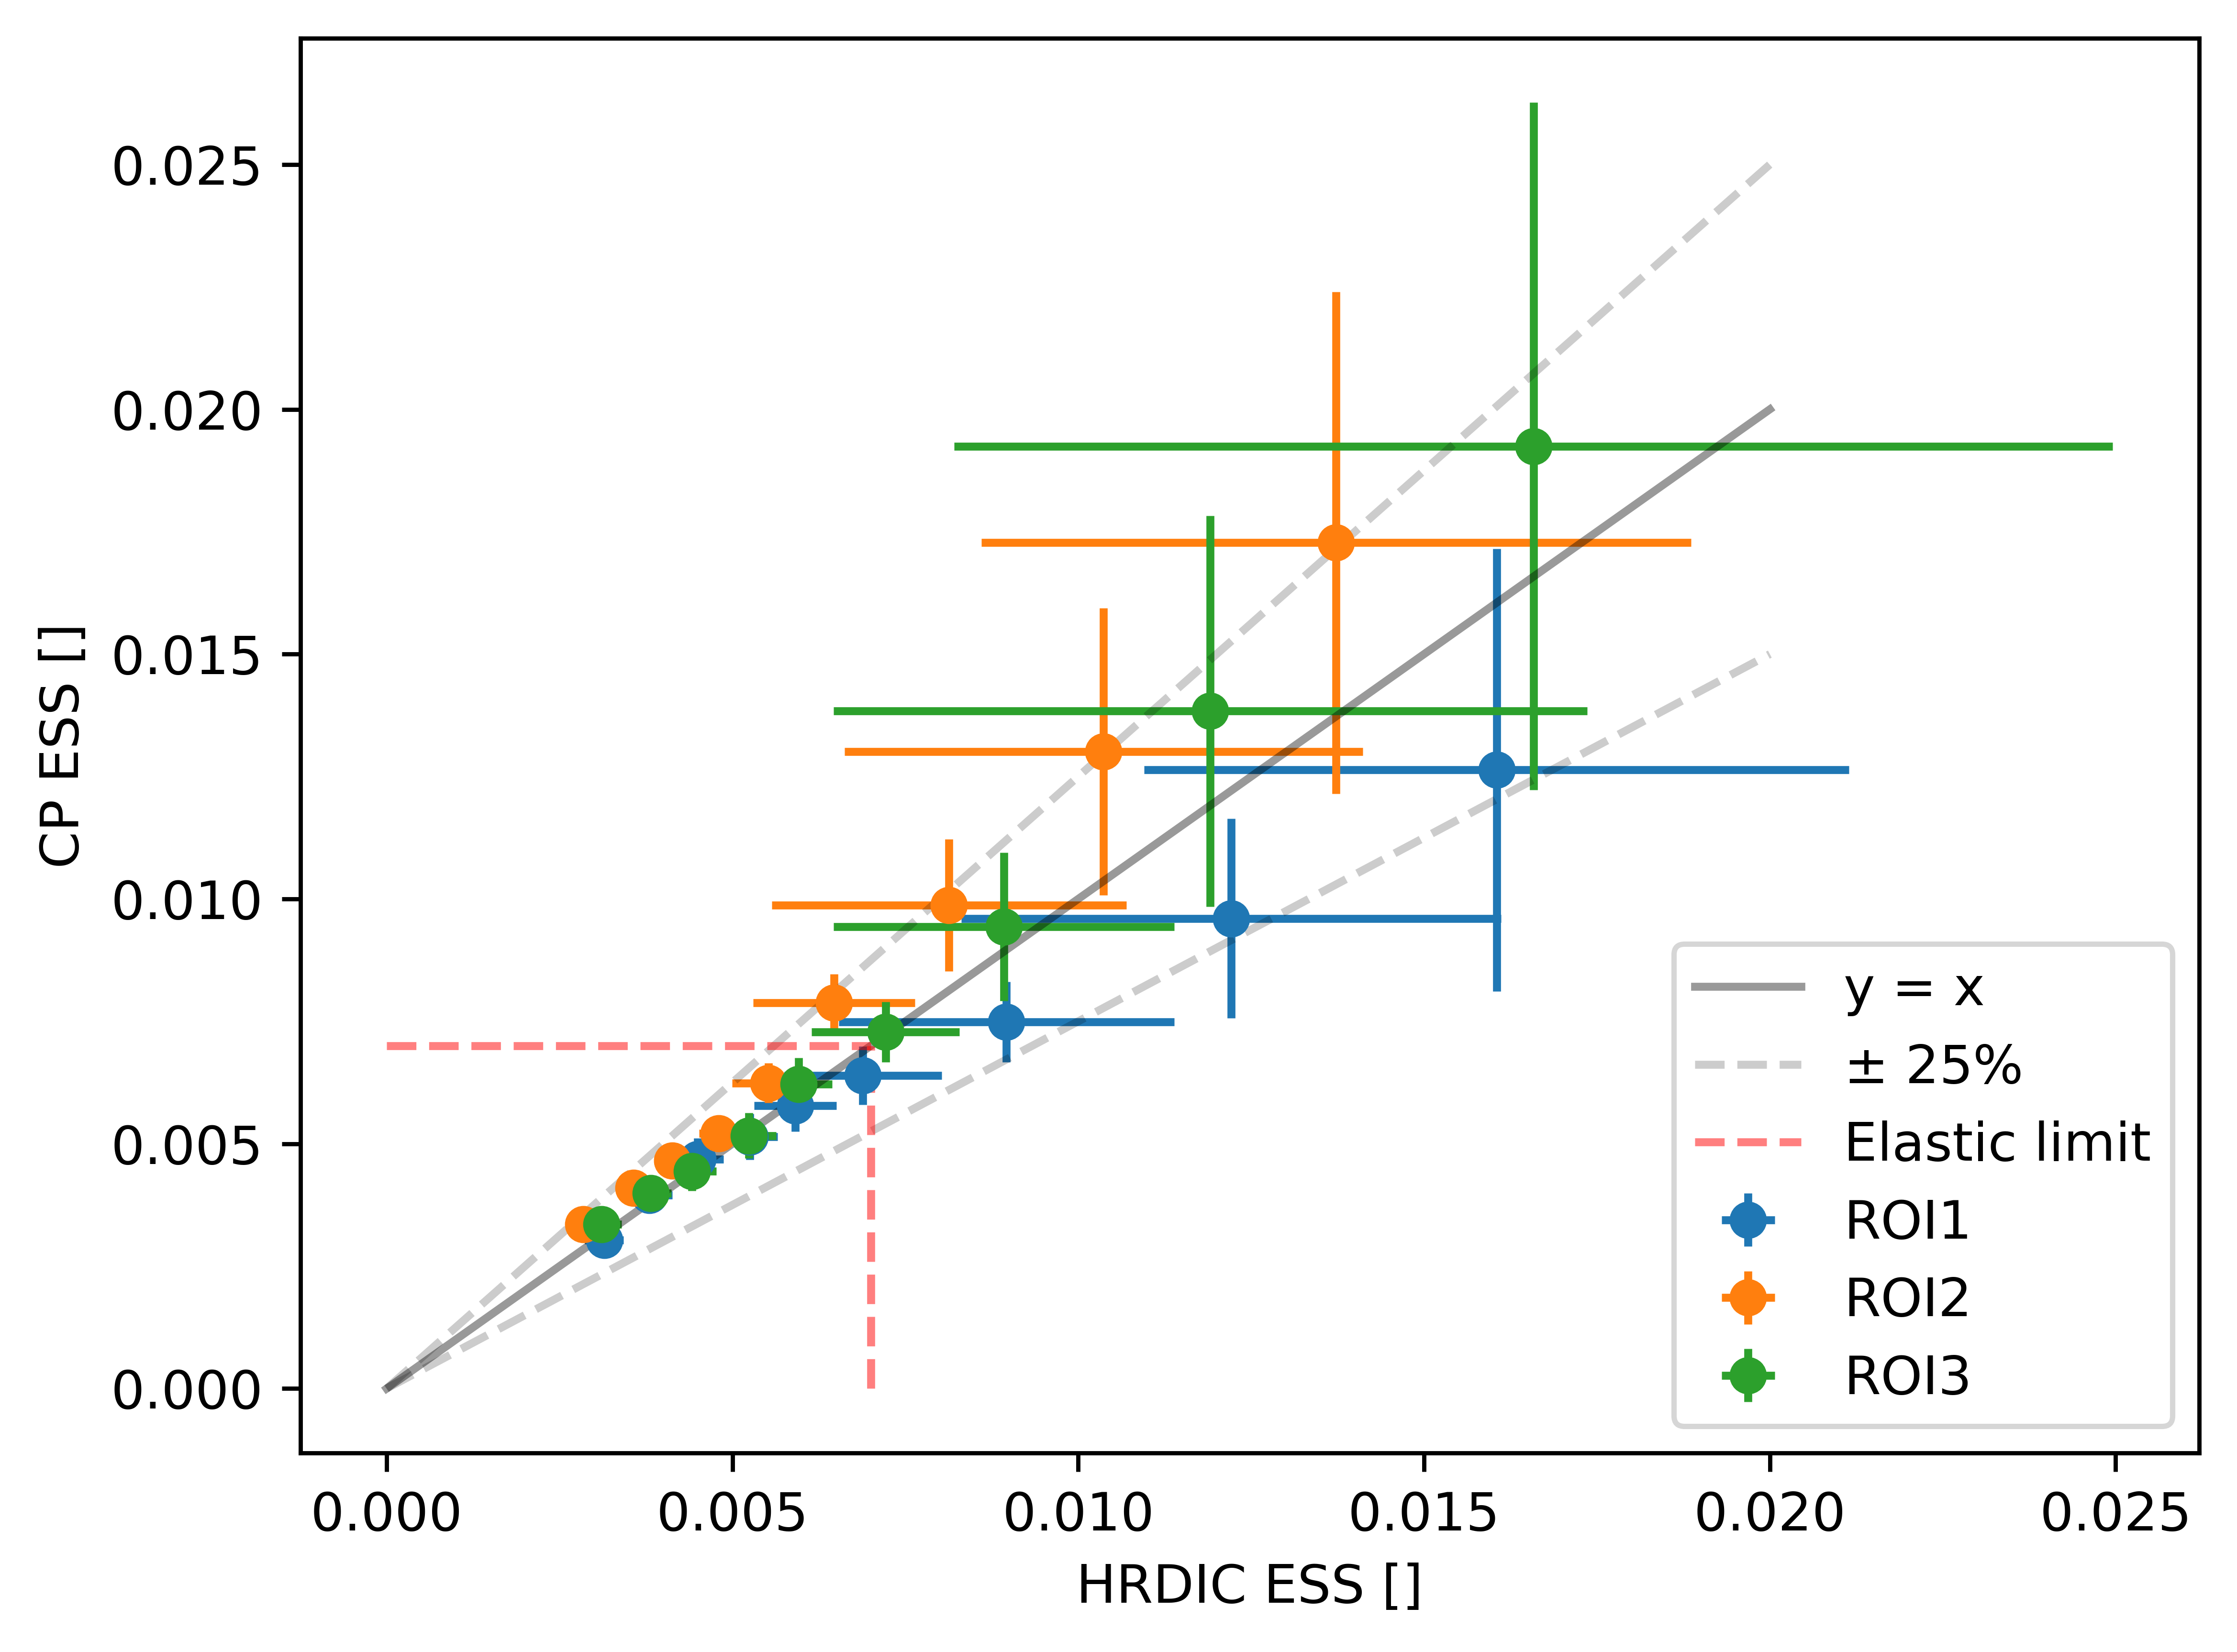

In [64]:
plt.figure(dpi=800)#figsize=(6,6),dpi=1200)
plt.errorbar(a3_zone1_strain['mean_HRDIC_ESS'],a3_zone1_strain['mean_CP_ESS'],xerr= a3_zone1_strain['std_HRDIC_ESS'],yerr= a3_zone1_strain['std_CP_ESS'],label='ROI1', fmt='o')
plt.errorbar(a3_zone2_strain['mean_HRDIC_ESS'],a3_zone2_strain['mean_CP_ESS'],xerr= a3_zone2_strain['std_HRDIC_ESS'],yerr= a3_zone2_strain['std_CP_ESS'],label='ROI2', fmt='o')
plt.errorbar(a3_zone3_strain['mean_HRDIC_ESS'],a3_zone3_strain['mean_CP_ESS'],xerr= a3_zone3_strain['std_HRDIC_ESS'],yerr= a3_zone3_strain['std_CP_ESS'],label='ROI3', fmt='o')
plt.ylabel('CP ESS []')
plt.xlabel('HRDIC ESS []')
x = np.linspace(0,0.02,100)
y1 = x
y2 = 1.25 * x
y3 = 0.75 * x
plt.plot(x, y1, 'k-', alpha=0.4, label='y = x')
plt.plot(x, y2, 'k-', alpha=0.2,linestyle='--',label=r'$\pm$ 25%')#, label='y = x')
plt.plot(x, y3, 'k-', alpha=0.2,linestyle='--')#, label='y = x')

x_coords = [0, 0.007]
y_coords = [0.007, 0.007]
plt.plot(x_coords, y_coords, color='r', alpha=0.5, linestyle='--', label='Elastic limit')
plt.plot(y_coords, x_coords, color='r', alpha=0.5, linestyle='--')

plt.legend(loc='lower right')
if plot_maps:
    plt.savefig(output +'../combined/CP_vs_HRDIC_ESS.png')

In [65]:
# First figure
plt.figure(dpi=1200,figsize=(10,4))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)

plt.scatter(A3_zone1_e11, exp_eng_stress_at_image_a3[0:len(e11)], label='ROI1 HRDIC')
plt.plot(A3_zone1_CP_mean_strain[:, 0, 0], A3_zone1_CP_mean_stress[:,0,0] / 1e6, label='ROI1 CP')

plt.scatter(A3_zone2_e11, exp_eng_stress_at_image_a3[0:len(e11)], label='ROI2 HRDIC')
plt.plot(A3_zone2_CP_mean_strain[:, 0, 0], A3_zone2_CP_mean_stress[:,0,0] / 1e6, label='ROI2 CP')

plt.scatter(A3_zone3_e11, exp_eng_stress_at_image_a3[0:len(e11)], label='ROI3 HRDIC')
plt.plot(A3_zone3_CP_mean_strain[:, 0, 0], A3_zone3_CP_mean_stress[:,0,0] / 1e6, label='ROI3 CP')

#plt.axvline(x=0.007, color='r', alpha=0.5, linestyle='--', label='Elastic limit')


plt.xlabel(r'True $\epsilon_{11}$ strain')
plt.ylabel('True stress (MPa)')
plt.xlim(0, 0.022)
plt.xticks([0, 0.005, 0.01, 0.015, 0.02])
plt.legend(loc='lower right')
plt.title('a')

# Second figure
plt.subplot(1, 2, 2)
plt.errorbar(a3_zone1_strain['mean_HRDIC_ESS'],a3_zone1_strain['mean_CP_ESS'],xerr= a3_zone1_strain['std_HRDIC_ESS'],yerr= a3_zone1_strain['std_CP_ESS'],label='ROI1', fmt='o')
plt.errorbar(a3_zone2_strain['mean_HRDIC_ESS'],a3_zone2_strain['mean_CP_ESS'],xerr= a3_zone2_strain['std_HRDIC_ESS'],yerr= a3_zone2_strain['std_CP_ESS'],label='ROI2', fmt='o')
plt.errorbar(a3_zone3_strain['mean_HRDIC_ESS'],a3_zone3_strain['mean_CP_ESS'],xerr= a3_zone3_strain['std_HRDIC_ESS'],yerr= a3_zone3_strain['std_CP_ESS'],label='ROI3', fmt='o')

x = np.linspace(0, 0.02, 100)
y1 = x
y2 = 1.25 * x
y3 = 0.75 * x

plt.plot(x, y1, 'k-', alpha=0.4, label='y = x')
plt.plot(x, y2, 'k-', alpha=0.2,linestyle='--',label=r'$\pm$ 25%')#, label='y = x')
plt.plot(x, y3, 'k-', alpha=0.2,linestyle='--')#, label='y = x')
x_coords = [0, 0.007]
y_coords = [0.007, 0.007]
plt.plot(x_coords, y_coords, color='r', alpha=0.5, linestyle='--', label='Elastic limit')
plt.plot(y_coords, x_coords, color='r', alpha=0.5, linestyle='--')


plt.xlabel('HRDIC grain average ESS')
plt.ylabel('CP grain average ESS')
plt.legend(loc='lower right')
plt.title('b')

# Adjust layout
plt.tight_layout()

# Save the figure
if plot_maps:
    plt.savefig(output + '../combined/combined_curves.png'.format(region))

# Show the plot
plt.show()


C:\Users\mbgm5pc3\AppData\Local\Temp\ipykernel_13840\3256884669.py:36: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y2, 'k-', alpha=0.2,linestyle='--',label=r'$\pm$ 25%')#, label='y = x')
C:\Users\mbgm5pc3\AppData\Local\Temp\ipykernel_13840\3256884669.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y3, 'k-', alpha=0.2,linestyle='--')#, label='y = x')


# Slip comparison ----------------------------------------------------------------------------------------

## HRDIC

In [66]:
slip_data_frame = pd.read_csv('Slip_activiation_{}.csv'.format(region),skiprows=5)
#slip_data_frame = pd.read_csv('Slip_activiation_A3_zone2.csv',skiprows=5)
#slip_data_frame = pd.read_csv('Slip_activiation_A3_zone3.csv',skiprows=5)

stress_at_step_a3 = exp_eng_stress_at_image_a3[1:]
a3_stress_at_step = []
for i in range(len(stress_at_step_a3)):
    a3_stress_at_step.append(int(stress_at_step_a3[i]))

num_grains_a3_zone1 = 37
num_grains_a3_zone2 = 26
num_grains_a3_zone3 = 25

num_grains_combined = np.sum([num_grains_a3_zone1,num_grains_a3_zone2,num_grains_a3_zone3])/100
#num_grains_combined
#slip_data_frame

In [67]:
file_name_1 = "A3_zone1_slip_activation.pickle"
with open(file_name_1, "rb") as pickle_file:
    slip_activation_A3_zone1 = pickle.load(pickle_file)

file_name_2 = "A3_zone2_slip_activation.pickle"
with open(file_name_2, "rb") as pickle_file:
    slip_activation_A3_zone2 = pickle.load(pickle_file)

file_name_3 = "A3_zone3_slip_activation.pickle"
with open(file_name_3, "rb") as pickle_file:
    slip_activation_A3_zone3 = pickle.load(pickle_file)
# Now, 'loaded_dict' contains the dictionary that was saved in the Pickle file
print(slip_activation_A3_zone2)

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {17: [['Basal'], 0.387]}, 8: {5: [['Basal'], 0.456], 12: [['Error in step 8 grain 12'], 0.422]}, 9: {1: [['Pyramidal <a>'], 0.481], 13: [['Error in step 9 grain 13'], 0.424], 14: [['Basal'], 0.433], 23: [['Prismatic'], 0.498]}, 10: {1: [['Basal'], 0.432], 8: [['Error in step 10 grain 8'], nan], 9: [['ambiguous'], nan], 13: [['Basal'], 0.433], 15: [['Error in step 10 grain 15'], 0.475], 19: [['Error in step 10 grain 19'], 0.435], 23: [['Pyramidal <a>'], 0.434], 24: [['Basal'], 0.385], 25: [['Pyramidal <a+c>'], 0.425]}, 11: {0: [['Pyramidal <a>'], 0.428], 11: [['Basal'], 0.406], 12: [['Error in step 11 grain 12'], nan], 15: [['Pyramidal <a>'], 0.432], 16: [['Pyramidal <a+c>'], 0.476], 18: [['ambiguous'], nan], 24: [['Basal'], 0.434], 25: [['Pyramidal <a+c>'], 0.324]}, 12: {2: [['ambiguous'], nan], 3: [['ambiguous'], nan], 5: [['Pyramidal <a+c>'], 0.384], 6: [['ambiguous'], nan], 7: [['Error in step 12 grain 7'], nan], 12: [['Error in s

In [68]:
keys_to_add =  ['step_1', 'step_2', 'step_3', 'step_4']
CP_strain = {key: CP_strain1.get(key, {}) for key in keys_to_add}
CP_strain.update(CP_strain1)

In [69]:
zones = {'A3_zone1':slip_activation_A3_zone1,
        'A3_zone2':slip_activation_A3_zone2,
        'A3_zone3':slip_activation_A3_zone3}
#slip_activation_zones = [zones[region]]#, slip_activation_A3_zone2, slip_activation_A3_zone3]
slip_activation_zones = [slip_activation_A3_zone1, slip_activation_A3_zone2, slip_activation_A3_zone3]

slip_activation_combined = hc.combine_slip_activation(slip_activation_zones)
#slip_activation_combined

In [70]:
sorted_keys = sorted(slip_activation_combined.keys())
sorted_slip_activation_combined = {key: slip_activation_combined[key] for key in sorted_keys}

In [71]:
exp_slip_system_counts = hc.HRDIC_count_slip_systems(sorted_slip_activation_combined)
#exp_slip_system_counts

In [72]:
exp_cumulative_counts = hc.calculate_cumulative_sum(exp_slip_system_counts)
exp_cumulative_counts

{'Basal': [1, 3, 8, 13, 19, 23, 23, 25, 29],
 'Prismatic': [0, 0, 0, 4, 10, 13, 20, 24, 27],
 'Pyramidal <a>': [0, 0, 0, 8, 13, 24, 33, 36, 37],
 'Pyramidal <a+c>': [0, 0, 0, 0, 5, 9, 14, 16, 17],
 'ambiguous': [0, 1, 5, 14, 16, 20, 29, 31, 35]}

## Crystal Plasticity

slip_data = np.load('{}_slip_data.npy'.format(region))

In [73]:
if local_validated == True:
    slip_data_a3_zone1 = np.load('../results/local_validated/A3_zone1/A3_zone1_slip_data.npy') 
    slip_data_a3_zone2 = np.load('../results/local_validated/A3_zone2/A3_zone2_slip_data.npy') 
    slip_data_a3_zone3 = np.load('../results/local_validated/A3_zone3/A3_zone3_slip_data.npy') 
elif local_validated == False: 
    slip_data_a3_zone1 = np.load('../results/macro_validated/A3_zone1/A3_zone1_slip_data.npy') 
    slip_data_a3_zone2 = np.load('../results/macro_validated/A3_zone2/A3_zone2_slip_data.npy') 
    slip_data_a3_zone3 = np.load('../results/macro_validated/A3_zone3/A3_zone3_slip_data.npy') 
elif local_validated == 'dev': 
    slip_data_a3_zone1 = np.load('../results/dev_validated/A3_zone1/A3_zone1_slip_data.npy') 
    slip_data_a3_zone2 = np.load('../results/dev_validated/A3_zone2/A3_zone2_slip_data.npy') 
    slip_data_a3_zone3 = np.load('../results/dev_validated/A3_zone3/A3_zone3_slip_data.npy') 

#region='A3_zone1'
file_name = "{}_strain_DIC.pickle".format(region)
with open(file_name, "rb") as pickle_file:
    strain_comparison = pickle.load(pickle_file)

grain_ID=strain_comparison['step_5']['grain_ID']

In [74]:
#region='A3_zone1'
file_name_1 = "A3_zone1_strain_DIC.pickle".format(region)
with open(file_name_1, "rb") as pickle_file:
    strain_comparison_a3_zone1 = pickle.load(pickle_file)
grain_ID_a3_zone1 =strain_comparison_a3_zone1 ['step_5']['grain_ID']

file_name_2 = "A3_zone2_strain_DIC.pickle".format(region)
with open(file_name_2, "rb") as pickle_file:
    strain_comparison_a3_zone2 = pickle.load(pickle_file)
grain_ID_a3_zone2 =strain_comparison_a3_zone2 ['step_5']['grain_ID']

file_name_3 = "A3_zone3_strain_DIC.pickle".format(region)
with open(file_name_3, "rb") as pickle_file:
    strain_comparison_a3_zone3 = pickle.load(pickle_file)
grain_ID_a3_zone3 =strain_comparison_a3_zone3 ['step_5']['grain_ID']

yeild_strain = 0.007 #%
#grainID=[25,50,75,80,90,100,110,120,125,150] 
k=5 #renaming constant
slip_CP = hc.get_activated(slip_data, yield_strain=yeild_strain, grainID=grain_ID,k=k)
system_CP = hc.sort_systems(slip_CP,k=k)
#slip_CP

In [75]:
yeild_strain = 0.007 #%
k=5 #renaming constant
slip_CP_a3_zone1 = hc.get_activated(slip_data_a3_zone1, yield_strain=yeild_strain, grainID=grain_ID_a3_zone1,k=k)
system_CP_a3_zone1 = hc.sort_systems(slip_CP_a3_zone1,k=k)

slip_CP_a3_zone2 = hc.get_activated(slip_data_a3_zone2, yield_strain=yeild_strain, grainID=grain_ID_a3_zone2,k=k)
system_CP_a3_zone2 = hc.sort_systems(slip_CP_a3_zone2,k=k)
    
slip_CP_a3_zone3 = hc.get_activated(slip_data_a3_zone3, yield_strain=yeild_strain, grainID=grain_ID_a3_zone3,k=k)
system_CP_a3_zone3 = hc.sort_systems(slip_CP_a3_zone3,k=k)

slip_system_counts_CP = hc.count_lengths(system_CP)
slip_system_counts_CP

In [76]:
slip_system_counts_CP_a3_zone1 = hc.count_lengths(system_CP_a3_zone1)
slip_system_counts_CP_a3_zone2 = hc.count_lengths(system_CP_a3_zone2)
slip_system_counts_CP_a3_zone3 = hc.count_lengths(system_CP_a3_zone3)

In [77]:
slip_system_counts_CP_a3_zone1

{'Basal': [0, 0, 0, 0, 2, 5, 10, 19, 25, 27],
 'Prismatic': [0, 0, 0, 0, 0, 3, 7, 24, 28, 31],
 'Pyramidal <a>': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Pyramidal <a+c>': [0, 0, 0, 0, 0, 0, 2, 15, 22, 25],
 'ambiguous': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [78]:
a3_zone2_slip_system_counts_CP={}
for key in slip_system_counts_CP_a3_zone2:
    a3_zone2_slip_system_counts_CP[key] =  slip_system_counts_CP_a3_zone2[key] +[0]

In [79]:
combined_CP_slip_activation={}
for key in slip_system_counts_CP_a3_zone1.keys():
    # Add corresponding values from all dictionaries for the same key
    combined_CP_slip_activation[key] = [sum(x) for x in zip(slip_system_counts_CP_a3_zone1[key], slip_system_counts_CP_a3_zone2[key], slip_system_counts_CP_a3_zone3[key])]
combined_CP_slip_activation

{'Basal': [0, 0, 0, 1, 14, 26, 41, 55, 67, 69],
 'Prismatic': [0, 0, 0, 0, 1, 16, 31, 60, 73, 80],
 'Pyramidal <a>': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Pyramidal <a+c>': [0, 0, 0, 0, 0, 1, 8, 33, 46, 52],
 'ambiguous': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

## Combined

In [80]:
a3_stress_at_step = []
for i in range(len(stress_at_step_a3)):
    a3_stress_at_step.append(int(stress_at_step_a3[i]))

In [81]:
k=5
i= next(iter(slip_activation_combined.keys()))
add_zeros =[] # (i-k-1) * [0]

In [82]:
slip_system_counts_EXP={}
for key in exp_cumulative_counts:
    slip_system_counts_EXP[key] = add_zeros + exp_cumulative_counts[key] 
len(slip_system_counts_EXP['Basal'])

9

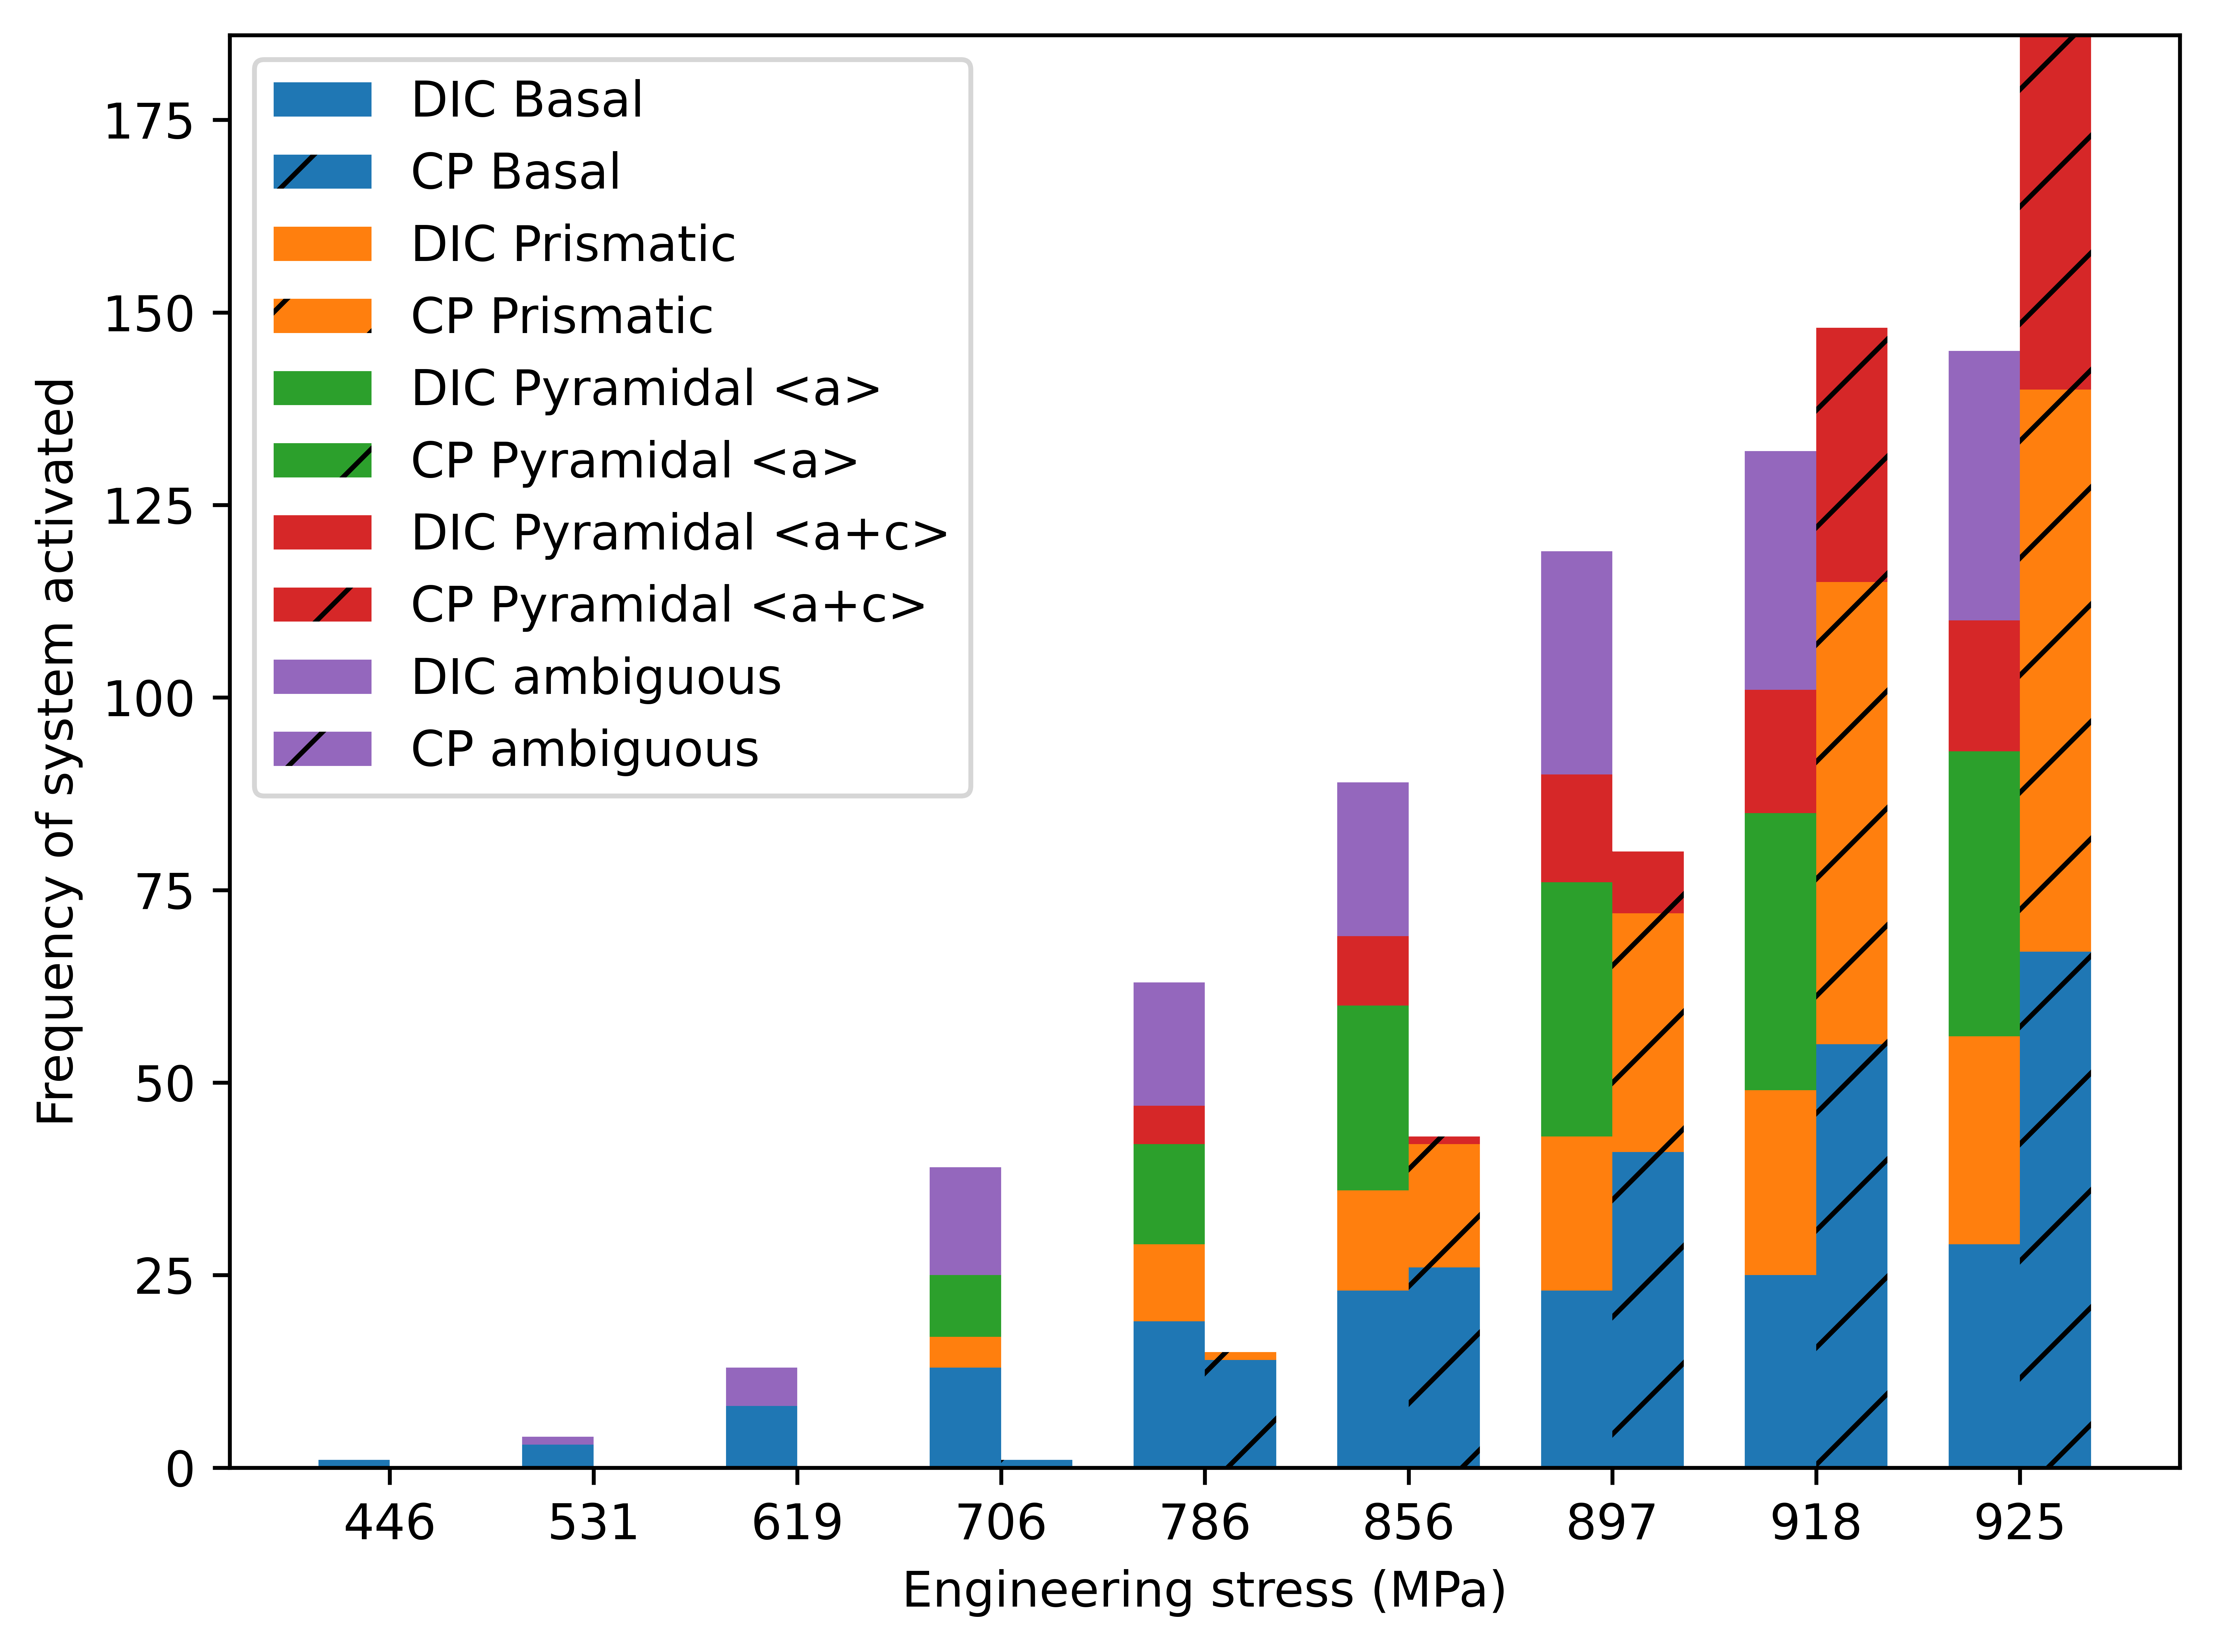

In [83]:
# Define colors for categories
colors = {'Basal': 'tab:blue',
          'Prismatic': 'tab:orange',
          'Pyramidal <a>': 'tab:green',
          'Pyramidal <a+c>': 'tab:red',
          'ambiguous': 'tab:purple'}

steps = list(slip_system_counts_EXP.values())[0]  # Assuming all categories have same steps
categories = list(slip_system_counts_EXP.keys())
stress_ticks = a3_stress_at_step[k-1:k+len(steps)-1]

fig, ax = plt.subplots(dpi=1200)

bar_width = 0.35
index = np.arange(len(steps))

exp_data_stacked = np.zeros(len(steps))
comp_data_stacked = np.zeros(len(steps))

for i, category in enumerate(categories):
    #exp_data = [slip_system_counts_EXP[category][j] for j in range(len(steps))]           #single region
    #comp_data = [slip_system_counts_CP[category][j] for j in range(len(steps))]           #single region

    exp_data = [slip_system_counts_EXP[category][j] for j in range(len(steps))]             #combined region
    comp_data = [combined_CP_slip_activation[category][j] for j in range(len(steps))]       #combined region
    
    ax.bar(index, exp_data, bar_width, bottom=exp_data_stacked, color=colors[category], label=f'DIC {category}')
    ax.bar(index + bar_width, comp_data, bar_width, bottom=comp_data_stacked, color=colors[category], hatch='/', label=f'CP {category}')

    exp_data_stacked += exp_data
    comp_data_stacked += comp_data

ax.set_xlabel('Engineering stress (MPa)')
ax.set_ylabel('Frequency of system activated')
#ax.set_title('{}'.format(region))
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(stress_ticks)
ax.legend()
#plt.xticks(range(len(steps)), stress_ticks)
plt.tight_layout()
if plot_maps:
    plt.savefig(output + '../combined/combined_slip_activation.png')

In [ ]:
slip_system_counts_EXP